In [1]:
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
aer_sim = Aer.get_backend('aer_simulator')

#  1. Deutch-Jozsa probléma

A Deutch-Jozsa algoritmust 1992-ben mutatták be. Ez volt az első példa arra, hogy egy kvantumos algoritmus jobban teljesít, mint a problémát megoldó legjobb klasszikus algoritmus. Mi ez a probléma? 
Adott egy olyan $f$ függvény, mely az n hosszuságú nulla-egy sorozatok teréből ($\{0,1\}^n$, $n \in \N_{+} $ ) képez a {0, 1} halmazba. (Minden n hosszúságú 0-1 sorozathoz hozzárendeli vagy a nullát vagy az egyet). 

$f(\textbf{x})\rightarrow~0~\text{vagy}~1$ , ahol $\textbf{x} = (x_0, x_1, x_2, ..., x_n)$ és $\forall~x_i \in \{0, 1\}$ 

Továbbá $f$-ről tudjuk, hogy vagy konstants vagy egyenletes. Egyenletes abban az értelemben, hogy pontosan annyi  n hosszú 0-1 sorozathoz rendeli a 0-át, mint ahányhoz az 1-et. A feladat az, hogy ha megkapunk egy ilyen függvényt, akkor döntsük el róla, hogy melyik: konstants vagy egyenletes?      

###  feladat 1 (bemelegítés):
Írj egy függvényt, ami megkap egy megfelelő konstants vagy egyenletes $f$ függvényt (, aminek érelmezési tartománya a 3 hosszú sorozatok) és eldönti róla, hogy melyik? Térjen vissza a függény Bool-lal és legyen a True $:=$ konstans és False $:=$ egyenletes

In [3]:
def DJ_klasszikus(func): 
    #func egy függvény, func()-al hívható és egy 0-1-ekből álló 3 hosszú array-t vár pl.: [0, 1, 0]
    #ide dolgozz
    
    return 

In [4]:
#Egy megvalósítás egyenletes f-re:
def f_egyenletes(x):
    return (x[0] + x[1] + x[2]) % 2
#Konstans f:
def f_konstans(x):
    return 1

Itt tesztelheted a megoldásod, ha kiszeded a #-et:

In [5]:
#print(DJ_klasszikus(f_egyenletes))
#print(DJ_klasszikus (f_konstans))

# 2. Kvantumos megoldás

A Deutch-Józsa algoritmus használatával egy kvantum számítógépen akár f(x) egy hívásával meg tudjuk válaszolni teljes biztonsággal a kérdést. Ehhez f(x)-ből egy kvantum "fekete doboz"-t kell tudnunk előállítani. Ami azt csinálja, hogy az $|x\rangle$$|y\rangle$ állapothoz hozzá rendeli a $|x\rangle$$|$mod$_2$(y + f(x))$\rangle$ állapotot, ahol mod$_2$() függvény a kettes osztási maradékot képző függvény. A n + 1 qubit szükséges az algoritmus kivitelezéséhez (, ahol n  a függvény által várt nulla-egy sorozatok hossza).  (Az algoritmus pontos működéséről adok segédanyagot)

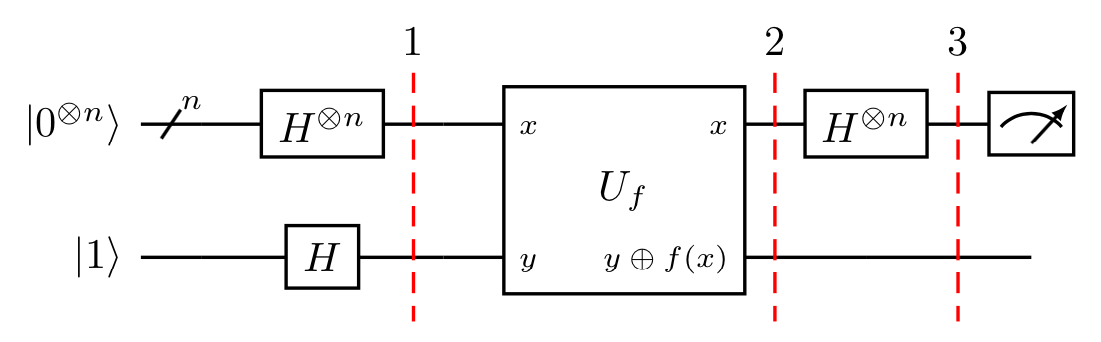

A ti feladatotok az lesz, hogy az alább megadott függvényekhez készítsétek el a kvantum oraclet. 
Ehhez az "építő elemeitek" : X, Y, Z, H, CNOT (egyáltalán nem szükséges az összeset használni, egyet többször is lehet)

### feladat 2:
Építsd meg a kvantum "fekete dobozt" a konstans 1 függvényhez, (n = 3 esetre):

In [6]:
#megoldásod egy függvénybe írdd, ami megkap egy circuit = QuantumCircuit(3+1) objektumot
#és abba rak építő elemeklet
def oracle_konst_1(circuit):
    
    #ide dolgozz
    
    
    return#ide nem kell semmít írj, mert a circuithez hozzá raktad az elemeket, nem kell visszatérni semmivel

def elso_szakasz(circuit):
    #circuithez tedd hozzá, az első szaggatott vonalig tartó kapukat
    
    #ide dolgozz
    
    return 
def harmadik_szakasz(circuit):
    #circuithez tedd hozzá a 2-3 és a 3 utáni szakaszt
    
    #ide dolgozz
    
    return 

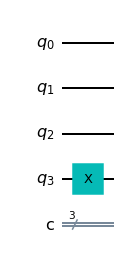

In [7]:
#itt megnézheted az áramkör részletet, amit írtál ( első két barrier között) kiegészítve teljessé
konst_test_circuit = QuantumCircuit(4,3) # 0-ból indul mindegyik qbit
konst_test_circuit.x(3)
elso_szakasz(konst_test_circuit)
oracle_konst_1(konst_test_circuit)
harmadik_szakasz(konst_test_circuit)

konst_test_circuit.draw(output = 'mpl')

### Teszt:

In [8]:
#akkor nézdd az eredményt, ha már a függvényed rak objektumot az áramkörbe
Xqobj = assemble(konst_test_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

### feladat 3:
Építsd meg a kvantum oraclet arra a függvényre, ami az alábbi módon hat (n = 3):

$f(x)$ = mod$_2$($\sum_{i=0}^{2} x_i$) .

($f$ egyenletes fv.)

In [9]:
#megoldásod egy függvénybe írdd, ami megkap egy circuit = QuantumCircuit(3+1) objektumot
#és abba rak építő elemeklet
def f_egyenletes_oracle(circuit):
    
    #ide dolgozz
    
    
    
    return #ide nem kell semmít írj, mert a circuithez hozzá raktad az elemeket, nem kell visszatérni semmivel

#eleje vége ugyan az mint a konstans esetben

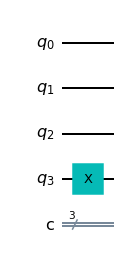

In [10]:
#itt megnézheted az áramkör részletet, amit írtál ( első két barrier között) kiegészítve teljessé
f_test_circuit = QuantumCircuit(4,3) # 0-ból indul mindegyik qbit
f_test_circuit.x(3)
elso_szakasz(f_test_circuit)
oracle_konst_1(f_test_circuit)
harmadik_szakasz(f_test_circuit)
konst_test_circuit.draw(output = 'mpl')

### Teszt:

In [ ]:
#akkor nézdd az eredményt, ha már a függvényed rak objektumot az áramkörbe
qobj = assemble(f_test_circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
from qiskit.tools.visualization import plot_histogram
plot_histogram(answer)